Step 1: Import Libraries
In this step, we load the tools we need for our project.

In [1]:
# Import pandas to work with data tables
import pandas as pd

# Import numpy for math operations
import numpy as np

# Import matplotlib and seaborn to create charts/graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Message to confirm everything is ready
print("All libraries are loaded and ready!")

Matplotlib is building the font cache; this may take a moment.


All libraries are loaded and ready!


Step 2: Load the Dataset
Now that the environment is ready, we will load the CSV file to start our analysis.

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('laptop_price - dataset.csv')

# Show the first 5 rows
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


Task 1: Plotting Laptop Prices
I am visualizing the distribution of prices for all laptops in the dataset.

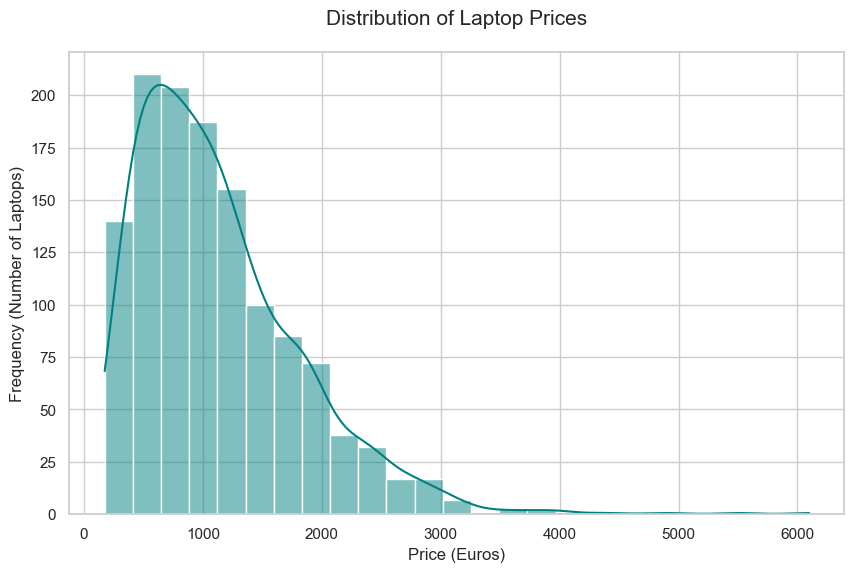

In [15]:
# Set the visual style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# Creating a styled histogram
sns.histplot(df['Price (Euro)'], kde=True, color='teal', bins=25)

# Mandatory Labels and Titles according to instructions
plt.title('Distribution of Laptop Prices', fontsize=15, pad=20)
plt.xlabel('Price (Euros)', fontsize=12)
plt.ylabel('Frequency (Number of Laptops)', fontsize=12)

plt.show()

Task 2: Average Price per Company
I am calculating the average laptop price for each company to identify which one is the most expensive.

Average laptop price for each company:
  Company  Price (Euro)
    Razer   3346.142857
       LG   2099.000000
      MSI   1728.908148
   Google   1677.666667
Microsoft   1612.308333
    Apple   1564.198571
   Huawei   1424.000000
  Samsung   1413.444444
  Toshiba   1267.812500
     Dell   1199.225120
   Xiaomi   1133.462500
     Asus   1123.829737
   Lenovo   1093.862215
       HP   1080.314664
  Fujitsu    729.000000
     Acer    633.464455
    Chuwi    314.296667
 Mediacom    295.000000
     Vero    217.425000
------------------------------
The company with the most expensive laptops on average is: Razer (3346.14 Euro)


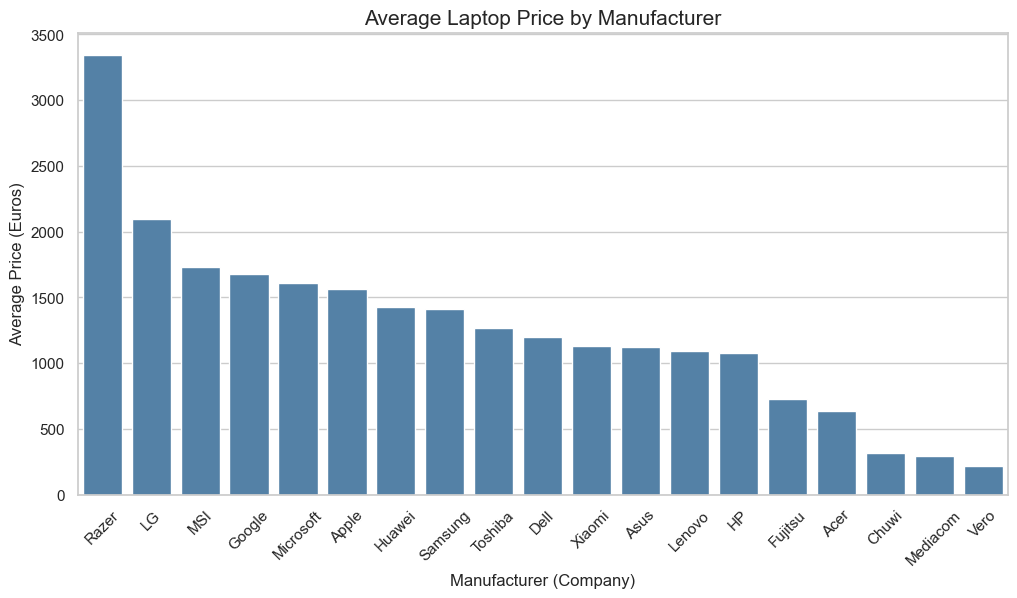

In [23]:
# 1. Calculate the average price for each company and sort it
avg_prices = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False).reset_index()

# 2. Print the average price for each company (Textual answer)
print("Average laptop price for each company:")
print(avg_prices.to_string(index=False))
print("-" * 30)

# 3. Identify and print the most expensive company
most_expensive = avg_prices.iloc[0]
print(f"The company with the most expensive laptops on average is: {most_expensive['Company']} ({most_expensive['Price (Euro)']:.2f} Euro)")

# 4. Visualization with a uniform color
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_prices, 
    x='Company', 
    y='Price (Euro)', 
    color='steelblue'  # Uniform professional color
)

plt.title('Average Laptop Price by Manufacturer', fontsize=15)
plt.xlabel('Manufacturer (Company)', fontsize=12)
plt.ylabel('Average Price (Euros)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

Task 3: Operating Systems Uniformity
I am identifying the different operating systems in the 'OpSys' column and unifying different versions of the same system(e.g., Windows and macOS) to ensure data consistency.

In [18]:
# 1. List all unique operating systems found in the data
original_systems = df['OpSys'].unique()
print("Original Operating Systems list:")
print(original_systems)

# 2. Fix the names to be uniform
# We group all Windows versions under 'Windows' and Mac versions under 'macOS'
df['OpSys'] = df['OpSys'].replace({
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'Windows 10 S': 'Windows',
    'Mac OS X': 'macOS',
    'macOS': 'macOS'
})

# 3. Verify the changes
unified_systems = df['OpSys'].unique()
print("\nUnified Operating Systems list:")
print(unified_systems)

Original Operating Systems list:
['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']

Unified Operating Systems list:
['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


Task 4: Price Distribution per Operating System
I am visualizing the price distribution for each unique operating system identified in the previous step. To ensure clarity, we generate a separate plot for each system, allowing for a detailed comparison of price ranges.

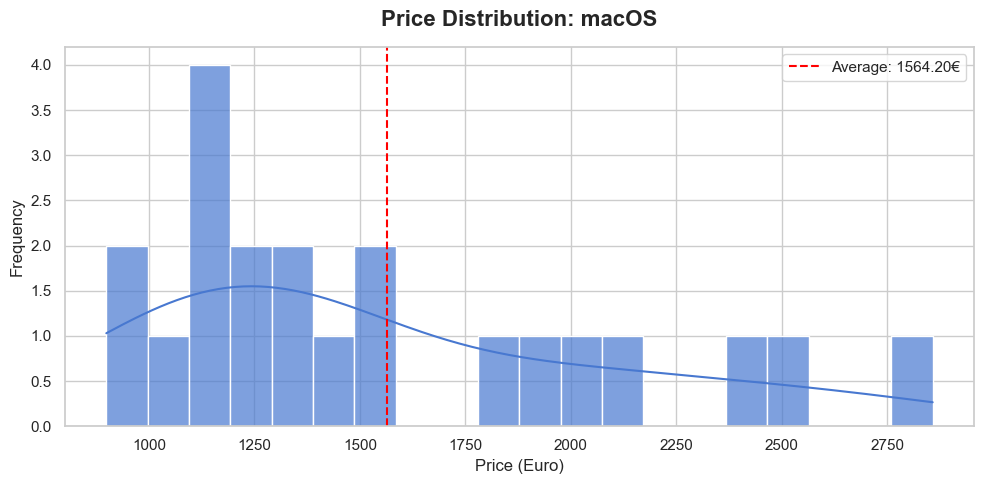

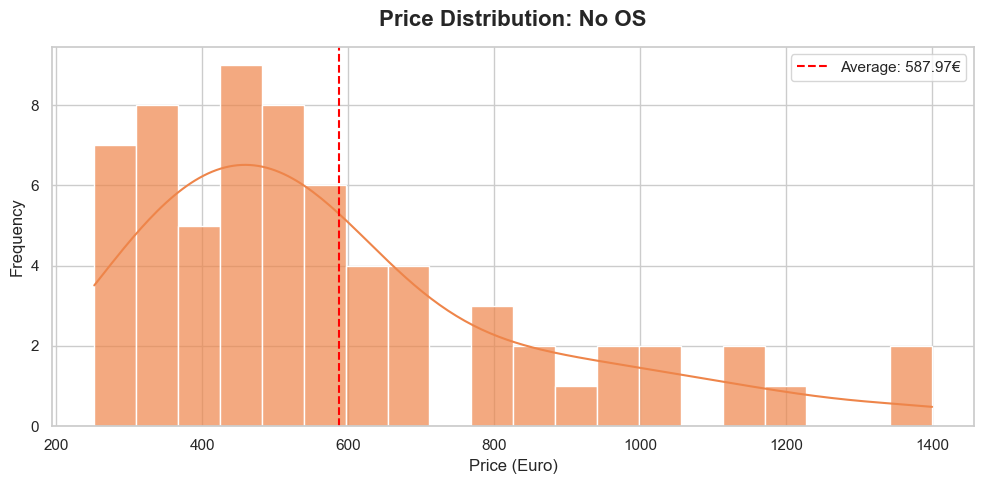

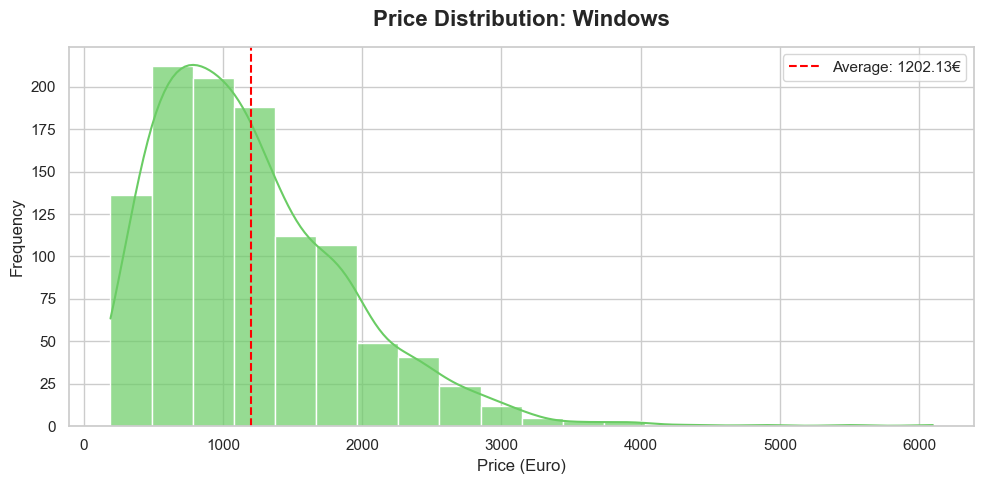

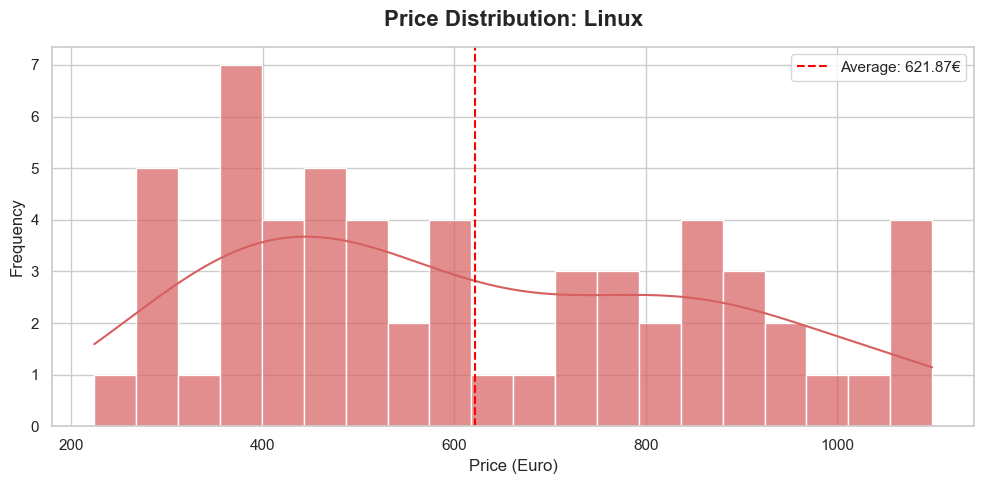

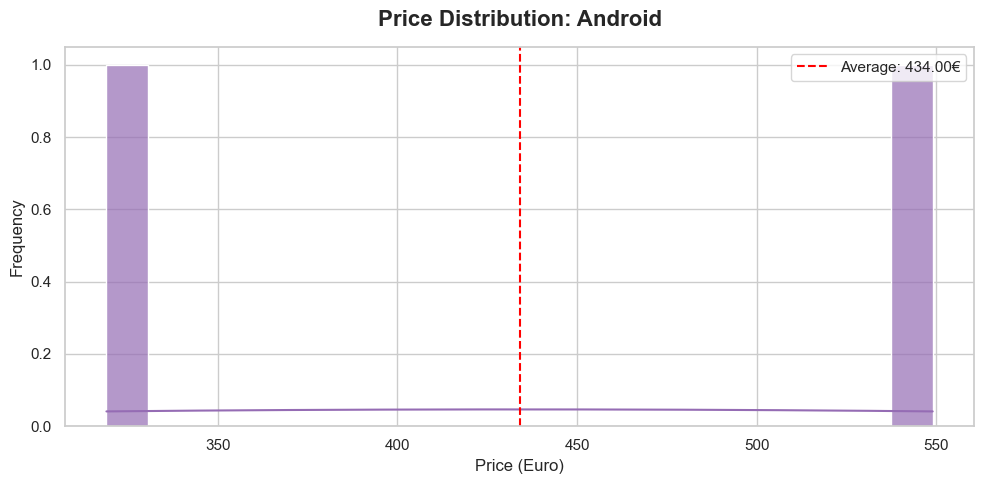

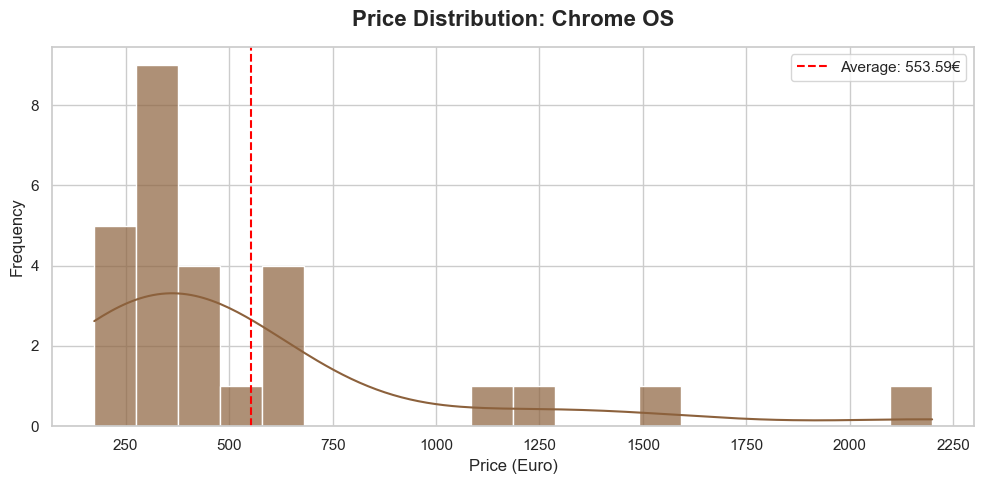

In [19]:
# Get the unique operating systems after the cleanup
unique_systems = df['OpSys'].unique()

# Define a color palette for the plots
colors = sns.color_palette("muted", len(unique_systems))

# Create a separate plot for each operating system
for i, os_name in enumerate(unique_systems):
    plt.figure(figsize=(10, 5))
    
    # Filter data for the specific OS
    os_data = df[df['OpSys'] == os_name]
    
    # Create an advanced distribution plot (Histogram + Density curve)
    sns.histplot(os_data['Price (Euro)'], kde=True, color=colors[i], bins=20, alpha=0.7)
    
    # Add titles and labels with specific formatting
    plt.title(f'Price Distribution: {os_name}', fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Price (Euro)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add a vertical line for the average price (Bonus Upgrade!)
    avg_price = os_data['Price (Euro)'].mean()
    plt.axvline(avg_price, color='red', linestyle='--', label=f'Average: {avg_price:.2f}€')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Task 5: RAM vs. Price Analysis (Filtered Data)
Based on instructional guidance, we are analyzing the relationship between RAM and Price after removing outliers. This ensures that extreme values do not distort our correlation analysis and visualizations.

Outlier Analysis & Data Cleaning:What is an outlier? An outlier is a data point that differs significantly from the rest of the observations, such as a laptop with $64GB$ RAM or a price exceeding $4000$ Euro, which can skew the overall correlation.How to detect it? I can detect outliers visually using a Scatter Plot or a Box Plot. Mathematically, I use the IQR (Interquartile Range) method or Z-scores.Action Taken: Based on my understanding of the task requirements, I identified these extreme values and removed them using the IQR method to ensure a more reliable and accurate correlation between RAM and Price.

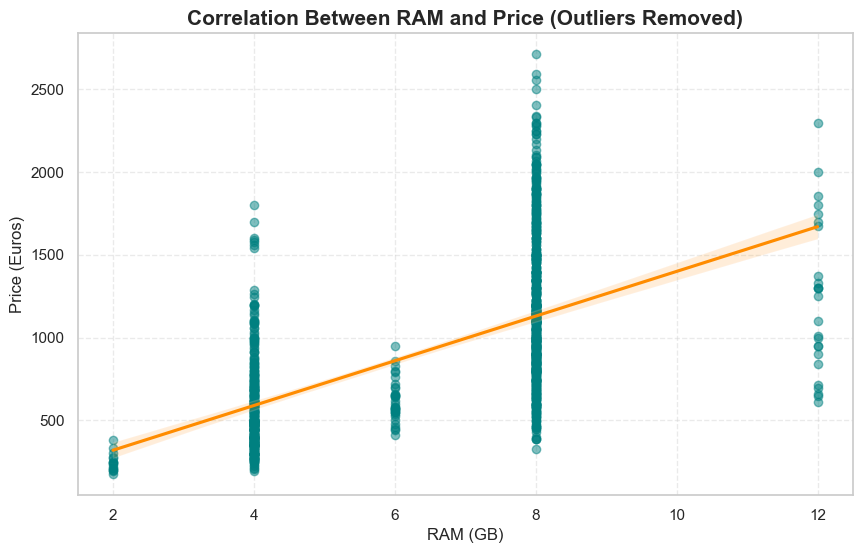

The correlation coefficient (without outliers) is: 0.59


In [20]:
# 1. Defining a function to filter outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 2. Removing outliers from Price and RAM
df_clean = remove_outliers(df, 'Price (Euro)')
df_clean = remove_outliers(df_clean, 'RAM (GB)')

# 3. Plotting the cleaned data
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='RAM (GB)', y='Price (Euro)', 
            scatter_kws={'alpha':0.5, 'color':'teal'}, 
            line_kws={'color':'darkorange'})

plt.title('Correlation Between RAM and Price (Outliers Removed)', fontsize=15, fontweight='bold')
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()

# 4. Calculating the new correlation
clean_corr = df_clean['RAM (GB)'].corr(df_clean['Price (Euro)'])
print(f"The correlation coefficient (without outliers) is: {clean_corr:.2f}")

Task 6: Feature Engineering - Storage Type Extraction
I am creating a new categorical column called 'Storage type' by extracting the specific hardware technology (such as SSD or HDD) from the 'Memory' string. This process simplifies the data and allows for a clearer analysis of how different storage technologies affect the laptop's price.

Verification of the new 'Storage type' column:


,Memory,Storage type
0,128GB SSD,SSD
1,128GB Flash Storage,Flash Storage
2,256GB SSD,SSD
3,512GB SSD,SSD
4,256GB SSD,SSD
5,500GB HDD,HDD
6,256GB Flash Storage,Flash Storage
7,256GB Flash Storage,Flash Storage
8,512GB SSD,SSD
9,256GB SSD,SSD


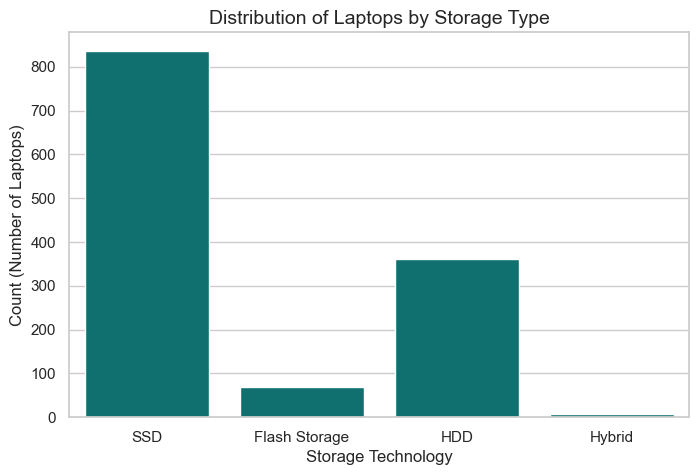

In [24]:
# 1. Function to extract the storage type
def extract_storage_type(memory_val):
    memory_val = str(memory_val).upper()
    if 'SSD' in memory_val: return 'SSD'
    if 'HDD' in memory_val: return 'HDD'
    if 'FLASH' in memory_val: return 'Flash Storage'
    if 'HYBRID' in memory_val: return 'Hybrid'
    return 'Other'

# 2. Apply the function to create the new column
df['Storage type'] = df['Memory'].apply(extract_storage_type)

# 3. Verify the result with the first 10 rows
print("Verification of the new 'Storage type' column:")
display(df[['Memory', 'Storage type']].head(10))

# 4. Visualization with a uniform color
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df, 
    x='Storage type', 
    color='teal'  # Uniform professional color
)

plt.title('Distribution of Laptops by Storage Type', fontsize=14)
plt.xlabel('Storage Technology', fontsize=12)
plt.ylabel('Count (Number of Laptops)', fontsize=12)

plt.show()

Final Summary All tasks from the assignment have been completed. I have analyzed prices, cleaned operating system names, visualized data relationships, and extracted storage information.